# 神经元

## Sigmoid

Sigmoid 型函数是指一类 S 型曲线函数，为两端饱和函数。常用的 Sigmoid 型
函数有 Logistic 函数和 Tanh 函数。

**Logistic函数**
$$
\sigma(x)=\frac{1}{1+exp(-x)}
$$

**Tanh函数**

$$
tanh(x)=\frac{exp(x)-exp(-x)}{exp(x)+exp(-x)}
$$

Tanh可以看做是放大并平移的Logistic函数。

$$
tanh(x) = 2\sigma(2x) − 1
$$

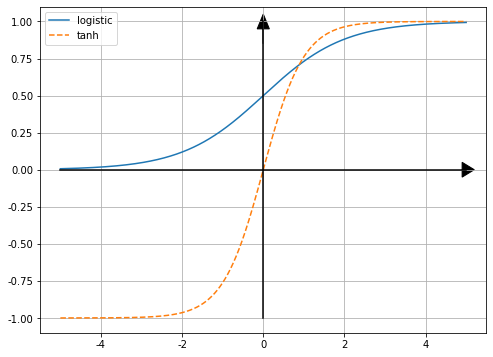

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5, 5, 1000)
logistic_y = 1/(1+np.exp(-x))
tanh_y = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

plt.figure(figsize=(8, 6))
plt.plot(x, logistic_y, label='logistic')
plt.plot(x, tanh_y, linestyle='--', label='tanh')
plt.plot([-5, 5], [0, 0], c='k')
plt.plot([0, 0], [-1, 1], c='k')
plt.arrow(5, 0, 0.2, 0, length_includes_head=True, head_width=0.1, head_length=0.3, fc='k', ec='k')
plt.arrow(0, 0.85, 0, 0.2, length_includes_head=True, head_width=0.3, head_length=0.1, fc='k', ec='k')
plt.legend()
plt.grid(True)

Logistic和Tanh计算开销大，可以使用分段函数代替。

**hard-logistic**

Logistic 在$0$附件的泰勒展开式为:
$$
\begin{aligned}
g_l(x) &\approx \sigma(0) + x \times \sigma′(0) \\
&= 0.25x + 0.5
\end{aligned}
$$
所以：
$$
\begin{aligned}
hard-logistic(x)&=
\begin{cases}
1 & g_l(x)\leq 1\\
g_l & 0 \lt g_l(x) \lt 1 \\
0 & g_l(x) \leq 0
\end{cases} \\
&= \max(\min(g_l(x), 1), 0) \\
&= \max(\min(0.25x + 0.5, 1), 0)
\end{aligned}
$$


**hard-tanh**

tanh在$0$附件的泰勒展开式为:
$$
\begin{aligned}
gt(x) &\approx tanh(0) + x times tanh′(0) \\
&= x
\end{aligned}
$$

所以

$$
\begin{aligned}
hard-tanh(x) &= \max(\min(g_t(x), 1), −1) \\
&= \max(\min(x, 1), −1)
\end{aligned}
$$

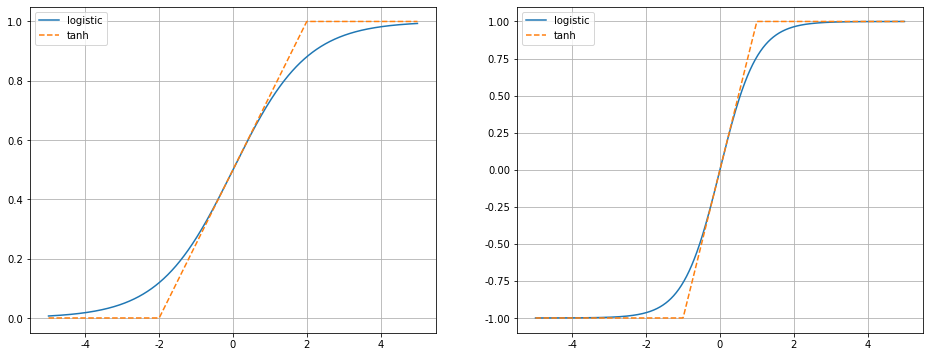

In [2]:
x = np.linspace(-5, 5, 1000)
logistic_y = 1/(1+np.exp(-x))
tanh_y = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

plt.figure(figsize=(16, 6))

glx = 0.25 * x + 0.5
hard_logistic_y = np.max(np.c_[np.min(np.c_[glx, np.ones_like(glx)], axis=1), np.zeros_like(glx)], axis=1)
hard_tanh_y = np.max(np.c_[np.min(np.c_[x, np.ones_like(x)], axis=1), np.full_like(x, -1)], axis=1)

plt.subplot(121)
plt.plot(x, logistic_y, label='logistic')
plt.plot(x, hard_logistic_y, linestyle='--', label='tanh')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(x, tanh_y, label='logistic')
plt.plot(x, hard_tanh_y, linestyle='--', label='tanh')
plt.legend()
plt.grid(True)

## 线性修正单元(Rectifier 函数)

$ReLU(x) = \max(0, x)$，只需要加、乘、比较操作，比较高效。具有比较好的生物解释性（单侧抑制、宽兴奋边界）和稀疏性（少数被激活）。

相比于Sigmoid的两端饱和，ReLU为左饱和函数，且$x \gt 1$时导数为$1$，缓解了梯度消失问题，加速了梯度下降的收敛速度。

**缺点**

1. 输出是非零中心化的，给后一层网络引入了偏置偏移，影响梯度下降的效率。

2. ReLU 神经元在训练时比较容易“死亡”。在训练 时，如果参数在一次不恰当的更新后，第一个隐藏层中的某个 ReLU 神经元在 所有的训练数据上都不能被激活，那么这个神经元自身参数的梯度永远都会是 0，在以后的训练过程中永远不能被激活。这种现象称为<span style="color:salmon">死亡 ReLU</span> 问题(Dying ReLU Problem)，并且也有可能会发生在其它隐藏层。

为了避免上述问题而引入了ReLU的几种变种：

### 带泄露的ReLU(Leaky ReLU)
在输入$x \lt 0$时，保持一个很小的梯度$\lambda$。这 样当神经元非激活时也能有一个非零的梯度可以更新参数，避免永远不能被激活。

$$
\begin{aligned}
LeakyReLU(x) &= 
\begin{cases}
x & if x \gt 0 \\
\lambda x & if x \leq 0
\end{cases} \\
&= \max(0, x)+\lambda \min(0, x) \\
&= max(x, \lambda x) \ 当\lambda \gt 1时
\end{aligned}
$$

### 带参数的ReLU(Parametric ReLU，PReLU)

不同神经元可以有不同的参数。对于第$i$个神经元，其PReLU的定义为:

$$
PReLU_i(x)=
\begin{cases}
x & if\ x \gt 0 \\
\gamma_i x & if\ x \leq 0
\end{cases}
$$

其中$\gamma_i$为$x \leq 0$时函数的斜率。因此，PReLU是非饱和函数。如果$\gamma_i = 0$，那么PReLU就退化为ReLU。如果$\gamma_i$为一个很小的常数，则PReLU可以看作带泄露的ReLU。PReLU可以允许不同神经元具有不同的参数，也可以一组神经元共享一个参数。

### 指数线性单元(Exponential Linear Unit，ELU)

是个近似的零中心化的非线性函数

$$
(x)=
\begin{cases}
x & if\ x \gt 0 \\
\gamma(exp(x)-1)& if\ x \leq 0
\end{cases}
$$

其中$\gamma \geq 0$是一个超参数，决定$x \leq 0$时的饱和曲线，并调整输出均值在0附近。

### Softplus 函数

可以看作是Rectifier函数的平滑版本，Softplus 函数其导数刚好是 Logistic 函数。Softplus 函数虽然也有具有单侧抑制、宽兴奋边界的特性，却没有稀疏激活性。

$$
Softplus(x) = log(1 + exp(x))
$$

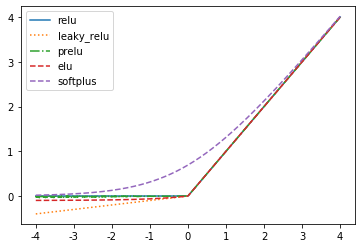

In [3]:
x = np.linspace(-4, 4, 1000)
relu = np.max(np.c_[x, np.zeros_like(x)], axis=1)
leaky_relu = np.array([v if v > 0 else 0.1*v for v in x])
prelu = np.array([v if v > 0 else np.random.rand()*v/100 for v in x])
elu = np.array([v if v > 0 else 0.1*(np.exp(v)-1) for v in x])
softplus = np.log(1+np.exp(x))

plt.plot(x, relu, label='relu')
plt.plot(x, leaky_relu, label='leaky_relu', linestyle=':')
plt.plot(x, prelu, label='prelu', linestyle='-.')
plt.plot(x, elu, label='elu', linestyle='--')
plt.plot(x, softplus, label='softplus', linestyle='--')
plt.legend()

## Swish 函数

Swish函数是一种自门控

$$
swish(x)=x\sigma(\beta x)
$$

其中$\sigma(·)$为Logistic函数，$\beta$为可学习的参数或一个固定超参数。$\sigma(·) \in (0,1)$可 以看作是一种软性的门控机制。当 $\sigma(\beta x)$ 接近于 $1$ 时，门处于“开”状态，激活函数的输出近似于 $x$ 本身;当 $\sigma(\beta x)$ 接近于 $0$ 时，门的状态为“关”，激活函数的输出 近似于 $0$。

当$\beta = 0$时，Swish函数变成线性函数$x/2$。 当$\beta = 1$时，Swish函数在$x \gt 0$时近似线性，在$x \lt 0$时近似饱和，同时具有一定的非单调性。当$\beta \rightarrow +\infty$时，$\sigma(\beta x)$趋向于离散的$0-1$函数，Swish函数近似为 ReLU 函数。因此，Swish 函数可以看作是线性函数和 ReLU 函数之间的非线性插 值函数，其程度由参数 $\beta$ 控制。

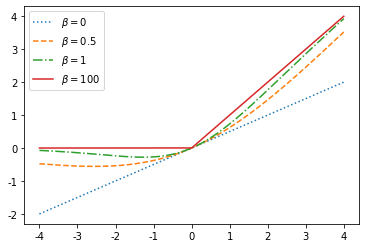

In [4]:
x = np.linspace(-4, 4, 1000)
for beta, linestyle in zip([0, 0.5, 1, 100], [':', '--', '-.', '-']):
    y = x * 1/ (1+np.exp(-(beta * x)))
    plt.plot(x, y, label=r'$\beta={}$'.format(beta), linestyle=linestyle)
plt.legend()

## 高斯误差线性单元(Gaussian Error Linear Unit，GELU)

和Swish函数比较类似，也是一种通过门控机制来调整其输出值的激活函数。

$$
GELU(x) = xP (X \leq x)
$$

其中$P(X \leq x)$是高斯分布$N(\mu,\sigma^2)$的累积分布函数，其中$\mu, \sigma$为超参数，一般 设$\mu = 0, \sigma = 1$即可。由于高斯分布的累积分布函数为S型函数，因此GELU可 以用 Tanh 函数或 Logistic 函数来近似，当使用 Logistic 函数来近似时，GELU 相当于一种特殊的 Swish 函数。

$$
GELU(x) \approx 0.5x\left( 1 + tanh(\sqrt{\frac{2}{\pi}}(x+0.044715x^3)) \right)
$$

或

$$
GELU(x) \approx x\sigma(1.702x)
$$

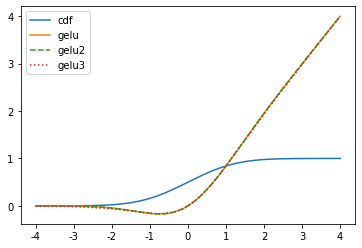

In [5]:
from scipy.stats import norm
x = np.linspace(-4, 4, 1000)
cdf = norm.cdf(x)
gelu = x*cdf

x2 = np.sqrt(2/np.pi)*(x+0.044715*x**3)
tanh_x2 = (np.exp(x2)-np.exp(-x2)) / (np.exp(x2)+np.exp(-x2))
gelu2 = 0.5*x*(1+tanh_x2)

gelu3 = x/(1+np.exp(-1.702*x))

plt.plot(x, cdf, label='cdf')
plt.plot(x, gelu, label='gelu')
plt.plot(x, gelu2, label='gelu2', linestyle='--')
plt.plot(x, gelu3, label='gelu3', linestyle=':')

plt.legend()

## Maxout 单元

Maxout单元也是一种分段线性函数。Sigmoid型函数、ReLU 等激活函数的输入是神经元的净输入$z$，是一个标量。而 Maxout 单元 的输入是上一层神经元的全部原始输出，是一个向量$\mathbf x = [x_1 ; x_2 ; \cdots ; x_d ]$。
每个Maxout单元有$K$个权重向量$w_k \in R^d$和偏置$b_k (1 \leq k \leq K)$。对于输入$\mathbf x$，可以得到$K$个净输入$z_k,1 \leq k \leq K$。采用Maxout单元的神经网 络也就做Maxout网络。
$$
  z_k = \mathbf w_k^T \mathbf x + b_k
$$
其中$w_k = [w_{k,1}, \cdots ,w_{k,d}]^T $为第$k$个权重向量。
Maxout 单元的非线性函数定义为
$$
maxout(\mathbf x) = \underset {k \in [1, k]}{\max} (z_k )
$$
Maxout 单元不单是净输入到输出之间的非线性映射，而是整体学习输入到输出之间的非线性映射关系。Maxout 激活函数可以看作任意凸函数的分段线性近似，并且在有限的点上是不可微的。


## 习题4-1

对于一个神经元$\sigma(\mathbf w^T \mathbf x+b)$，并使用梯度下降优化参数$\mathbf w$时，如果输入$\mathbf x$ 恒大于 $0$，其收敛速度会比零均值化的输入更慢。

$$
\mathbf y = \mathbf x \mathbf w + b
$$

最小化

$$
\mathcal L(\mathbf w, b) = \frac{1}{2}(\mathbf x \mathbf w + b - \mathbf y)^2
$$

求导

$$
\mathbf w_{k+1} = \mathbf w_k + \alpha \mathbf x^T(\mathbf x \mathbf w_k - \mathbf y)
$$

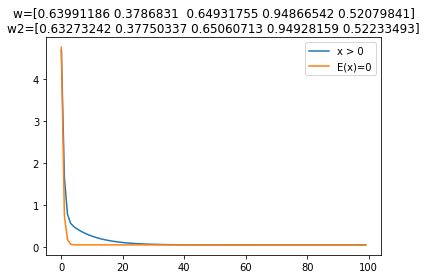

In [6]:

def train(X, y, max_iter=100, alpha=0.01):
    costs = []
    w = np.ones((X.shape[1], 1))
    for epoch in range(max_iter):
        cost = 1.0/2 * np.linalg.norm(X@w-y, 2)
        costs.append(cost)
        dw = X.T@(X@w-y)
        w += -alpha*dw
    return w, costs


feature_num = 5
sample_num = 100
w0 = np.random.rand(feature_num, 1)
b0 = np.random.rand()

X = np.random.rand(sample_num, feature_num)
y = X@w0 + np.random.randn(sample_num, 1) / 100

X2 = np.random.randn(sample_num, feature_num)
y2 = X2@w0 + np.random.randn(sample_num, 1) / 100

w, costs = train(X, y)
w2, costs2 = train(X2, y2)

plt.plot([i for i in range(len(costs))], costs, label='x > 0')
plt.plot([i for i in range(len(costs2))], costs2, label='E(x)=0')
plt.title('w={}\nw2={}'.format(w.flatten(), w2.flatten()))
plt.legend()

## 习题4-2
试设计一个前馈神经网络(Feedforward Neural Network，FNN)来解决XOR问题，要求该前馈神经网 络具有两个隐藏神经元和一个输出神经元，并使用 ReLU 作为激活函数。

In [34]:
def active_func(z):
    return 0 if z < 0 else 1

w11, b11 = np.array([1, 1]).reshape(-1, 1), -3/2
w12, b12 = np.array([1, 1]).reshape(-1, 1), -1/2
w2, b2 = np.array([-2, 1]).reshape(-1, 1), -1/2


X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y = []
for x in X:
    z11, z12 = active_func((x@w11+b11).item(0)), active_func((x@w12+b12).item(0))
    print(z11, z12)
    z2 = (np.array([z11, z12])@w2+b2).item(0)
    y.append(active_func(z2))
    
print(y)

0 0
1 1
0 1
0 1
[0, 0, 1, 1]


## 习题4-3

试举例说明“死亡ReLU问题”，并提出解决方法。

Relu的输入是$z_n=\sum_{i=0}^k w_i a^n_i$，其中$a^n_i$是前一层输出的$x_n$通过激活函数后的值。误差$error = ReLU - y$，梯度:

$$
\frac{\partial error}{\partial z_n} = \delta_n = \left\{
\begin{array}{c l}     
    1 & z_n \geq 0\\
    0 & z_n < 0
\end{array}\right.
$$

梯度变成$0$之后$w$无法更新。

## 习题4-4
计算Swish函数$swish(x) = x\sigma(\beta x)$的导数。

$$
\begin{aligned}
\frac{\partial swish(x)}{\partial x} &= x' \sigma(\beta x) + x \sigma'(\beta x) \\
&= \sigma(\beta x) + x \left(\sigma(\beta x) (1 - \sigma(\beta x)) (\beta x)'\right) \\
&= \sigma(\beta x) + \beta x \left(\sigma(\beta x) (1 - \sigma(\beta x)) \right) \\
&= (\beta x + 1)\sigma(\beta x)-\beta x \sigma(\beta x)^2
\end{aligned}
$$

## 习题4-5 
如果限制一个神经网络的总神经数量为$N$，层数为$L$，每个隐藏层的神经元数量为 $\frac{N −1}{L−1}$ ，试分析参数数量和层数 $L$ 的关系。 

每个节点的参数数量是上一层的神经元个数，所以一层有$\frac{N −1}{L−1}\times \frac{N −1}{L−1}$个参数，隐藏层总共有$N-1$个神经元，最后输出层一个神经元

$$
(L-1)\frac{N −1}{L−1}\times \frac{N −1}{L−1} + \frac{N −1}{L−1} = \frac{(N −1)^2+N-1}{L-1} = \frac{N(N-1)}{L-1}
$$

## 习题4-7 

为什么在神经网络模型的结构化风险函数中不对偏置$b$进行正则化?

偏置和过拟合无关

## 习题4-8 

为什么在用反向传播算法进行参数学习时要采用随机参数初始化的方式而不是直接令$W =0,b=0$?

1. 都初始化为$0$容易落到局部最优点
2. 所有的cell的初始权重一样，会使得他们按照同样的梯度更新，最后得到一样的权重。

## 习题4-9 

梯度消失问题是否可以通过增加学习率来缓解?

不能

## FNN 实现

第$l$层的权重$\mathbf w^{(l)}$的梯度:

$$
\frac{\partial \mathcal L}{\partial \mathbf w^{(l)}} = \delta^{(l)}(\mathbf x^{(l-1)})^T
$$

第$l$层的偏置$b^{(l)}$的梯度:

$$
\frac{\partial \mathcal L}{\partial b{(l)}} = \delta^{(l)}
$$

其中$\mathbf x^{(l)}$是第$l$层的输入，$\mathbf z^{(l)}$是第$l$层的输出。

$$
\delta^{(l)}=f'_l(\mathbf z^{(l)})\odot\left((\mathbf w^{(l+1)})^T\delta^{(l+1)}\right)
$$

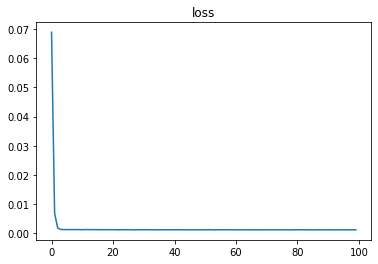

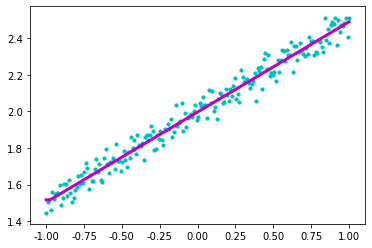

In [46]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
class Cell:
    def __init__(self, input_dim, activator, grad_act):
        self.w = np.random.rand(input_dim, 1)
        self.b = np.random.rand()
        self.activator = activator
        self.grad_act = grad_act
        self.x = None
    
    def output(self, X):
        self.x = X
        self.o = self.activator((X @ self.w + self.b).item(0))
        return self.o
    
    def gradient(self):
        return self.grad_act(self.o)


class FNN:
    def __init__(self, input_dim, activator, grad_act):
        self.layers = [[Cell(1, activator, grad_act) for _ in range(input_dim)]]
    
    def add_layer(self, size, activator, grad_act):
        input_dim = len(self.layers[-1])
        self.layers.append([Cell(input_dim, activator, grad_act) for i in range(size)])
    
    def train(self, X, Y, max_iter=100, alpha=0.01, batch_size=30):
        N, M = X.shape[0], X.shape[1]
        costs = []
        for epoch in range(max_iter):
            index = np.arange(N)
            np.random.shuffle(index)
            X, Y = X[index], Y[index]
            cost = 0
            for i in range(N):
                x, y = X[i], Y[i]
                ypred = self._forward(x)
                cost += 0.5*(y-ypred)**2 / N
                self._back_progation(ypred, y, alpha)
            costs.append(cost)
                
        return costs
    
    def predict(self, X):
        return np.array([self._forward(x) for x in X])
    
    def _back_progation(self, ypred, y, alpha):
        d = ypred-y
        for layer in reversed(self.layers):
            for cell in layer:
                # d_l = d_l * f'(z_l)
                # dw = d_l * x.T
                dw = d*cell.gradient()*cell.x
                cell.w -= alpha * dw.T
                cell.b -= alpha * d
            
            # d_l = w.T@d_{l+1}
            d = np.sum([cell.w * d for cell in layer])
    
    def _forward(self, x):
        o = x.reshape(1, -1)
        for layer in self.layers:
            o = np.array([c.output(o) for c in layer]).reshape(1, -1)
        return o.item(0)


def relu(x):
    return max(0, x)

def grad_relu(x):
    return 1 if x > 0 else 0
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_sigmoid(x):
    return x*(1-x)

def make_data():
    X = np.linspace(-1, 1, 200)
    np.random.shuffle(X)  # randomize the data
    y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200,))
    return X.reshape(-1, 1), y.reshape(-1, 1)
            
def test_fnn():
    X, y = make_data()
    fnn = FNN(1, relu, grad_relu)
    fnn.add_layer(2, relu, grad_relu)
    fnn.add_layer(1, relu, grad_relu)
    costs = fnn.train(X, y)
    
    plt.figure()
    plt.title('loss')
    plt.plot([i for i in range(len(costs))], costs)
    plt.show()
    
    X_test = np.linspace(-1, 1, 100)
    y_test = fnn.predict(X_test)
    
    plt.figure()
    plt.scatter(X, y, s=10, fc='c')
    plt.plot(X_test, y_test, c='m', lw=3)
    plt.show()        
        
test_fnn()        